In [22]:
# importing libraries
import pandas as pd
import numpy as np


In [23]:
# read the dataset
raw_df = pd.read_excel('/Users/Dinakaraprabhu/Data Science Projects/Industrial-Copper-Modeling/notebook/raw_data/data.xlsx')

In [26]:
# copy the raw dataframe
df = raw_df.copy()

In [27]:
# regression

df.head()

ModuleNotFoundError: No module named 'pandas.io.formats.string'

ModuleNotFoundError: No module named 'pandas.io.formats.html'

In [28]:
# drop the id column
df.drop(columns=['id'],axis=1,inplace=True)

In [152]:
df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [153]:
# convert the float to datetime

df['item_date'] = pd.to_datetime(df['item_date'],format='%Y%m%d',errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'],format = '%Y%m%d',errors='coerce')

In [154]:
df['item_day'] = df['item_date'].dt.day
df['item_month'] = df['item_date'].dt.month
df['item_year'] = df['item_date'].dt.year

In [155]:
df['delivery_day'] = df['delivery date'].dt.day
df['delivery_month'] = df['delivery date'].dt.month
df['delivery_year'] = df['delivery date'].dt.year

In [156]:
df.drop(columns=['delivery date','item_date'],inplace=True)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   quantity tons   181673 non-null  object 
 1   customer        181672 non-null  float64
 2   country         181645 non-null  float64
 3   status          181671 non-null  object 
 4   item type       181673 non-null  object 
 5   application     181649 non-null  float64
 6   thickness       181672 non-null  float64
 7   width           181673 non-null  float64
 8   material_ref    103754 non-null  object 
 9   product_ref     181673 non-null  int64  
 10  selling_price   181672 non-null  float64
 11  item_day        181670 non-null  float64
 12  item_month      181670 non-null  float64
 13  item_year       181670 non-null  float64
 14  delivery_day    181670 non-null  float64
 15  delivery_month  181670 non-null  float64
 16  delivery_year   181670 non-null  float64
dtypes: float64

In [158]:
df['quantity tons'] = pd.to_numeric(df['quantity tons'],errors='coerce')

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   quantity tons   181672 non-null  float64
 1   customer        181672 non-null  float64
 2   country         181645 non-null  float64
 3   status          181671 non-null  object 
 4   item type       181673 non-null  object 
 5   application     181649 non-null  float64
 6   thickness       181672 non-null  float64
 7   width           181673 non-null  float64
 8   material_ref    103754 non-null  object 
 9   product_ref     181673 non-null  int64  
 10  selling_price   181672 non-null  float64
 11  item_day        181670 non-null  float64
 12  item_month      181670 non-null  float64
 13  item_year       181670 non-null  float64
 14  delivery_day    181670 non-null  float64
 15  delivery_month  181670 non-null  float64
 16  delivery_year   181670 non-null  float64
dtypes: float64

In [160]:
df['material_ref']=df['material_ref'].replace(r'^0000.*', 'unknown', regex=True)

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   quantity tons   181672 non-null  float64
 1   customer        181672 non-null  float64
 2   country         181645 non-null  float64
 3   status          181671 non-null  object 
 4   item type       181673 non-null  object 
 5   application     181649 non-null  float64
 6   thickness       181672 non-null  float64
 7   width           181673 non-null  float64
 8   material_ref    103754 non-null  object 
 9   product_ref     181673 non-null  int64  
 10  selling_price   181672 non-null  float64
 11  item_day        181670 non-null  float64
 12  item_month      181670 non-null  float64
 13  item_year       181670 non-null  float64
 14  delivery_day    181670 non-null  float64
 15  delivery_month  181670 non-null  float64
 16  delivery_year   181670 non-null  float64
dtypes: float64

In [162]:
df.shape

(181673, 17)

In [163]:
df.isnull().sum()

quantity tons         1
customer              1
country              28
status                2
item type             0
application          24
thickness             1
width                 0
material_ref      77919
product_ref           0
selling_price         1
item_day              3
item_month            3
item_year             3
delivery_day          3
delivery_month        3
delivery_year         3
dtype: int64

In [164]:
df['material_ref'].value_counts()

material_ref
unknown                          22726
DX51D+Z                            922
G9010                              856
DC01 RED.FLAT KUCHNIA EKO 2.2      777
DC01                               725
                                 ...  
N01-0008117                          1
R8GB-040                             1
FZPA002067                           1
FZPA004301                           1
202006170005.IO.1.1                  1
Name: count, Length: 11496, dtype: int64

In [165]:
df.drop(columns = ['material_ref'],inplace=True)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   quantity tons   181672 non-null  float64
 1   customer        181672 non-null  float64
 2   country         181645 non-null  float64
 3   status          181671 non-null  object 
 4   item type       181673 non-null  object 
 5   application     181649 non-null  float64
 6   thickness       181672 non-null  float64
 7   width           181673 non-null  float64
 8   product_ref     181673 non-null  int64  
 9   selling_price   181672 non-null  float64
 10  item_day        181670 non-null  float64
 11  item_month      181670 non-null  float64
 12  item_year       181670 non-null  float64
 13  delivery_day    181670 non-null  float64
 14  delivery_month  181670 non-null  float64
 15  delivery_year   181670 non-null  float64
dtypes: float64(13), int64(1), object(2)
memory usage: 22.2+ 

In [167]:
df.dropna(subset=['selling_price'], inplace=True)

In [168]:
df.isna().sum()

quantity tons      1
customer           1
country           28
status             2
item type          0
application       24
thickness          1
width              0
product_ref        0
selling_price      0
item_day           3
item_month         3
item_year          3
delivery_day       3
delivery_month     3
delivery_year      3
dtype: int64

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181672 entries, 0 to 181672
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   quantity tons   181671 non-null  float64
 1   customer        181671 non-null  float64
 2   country         181644 non-null  float64
 3   status          181670 non-null  object 
 4   item type       181672 non-null  object 
 5   application     181648 non-null  float64
 6   thickness       181671 non-null  float64
 7   width           181672 non-null  float64
 8   product_ref     181672 non-null  int64  
 9   selling_price   181672 non-null  float64
 10  item_day        181669 non-null  float64
 11  item_month      181669 non-null  float64
 12  item_year       181669 non-null  float64
 13  delivery_day    181669 non-null  float64
 14  delivery_month  181669 non-null  float64
 15  delivery_year   181669 non-null  float64
dtypes: float64(13), int64(1), object(2)
memory usage: 23.6+ MB


In [170]:
df.drop(columns=['customer'],inplace=True,axis=1)

In [171]:
df.isnull().sum()

quantity tons      1
country           28
status             2
item type          0
application       24
thickness          1
width              0
product_ref        0
selling_price      0
item_day           3
item_month         3
item_year          3
delivery_day       3
delivery_month     3
delivery_year      3
dtype: int64

In [172]:
df['quantity tons'].fillna(df['quantity tons'].median(),inplace=True)
df['country'].fillna(df['country'].mode()[0],inplace=True)
df['status'].fillna(df['status'].mode()[0],inplace=True)
df['application'].fillna(df['application'].median(),inplace=True)
df['thickness'].fillna(df['thickness'].median(),inplace=True)
df['item_day'].fillna(df['item_day'].median(),inplace=True)
df['item_month'].fillna(df['item_month'].median(),inplace=True)
df['item_year'].fillna(df['item_year'].median(),inplace=True)
df['delivery_day'].fillna(df['delivery_day'].median(),inplace=True)
df['delivery_month'].fillna(df['delivery_month'].median(),inplace=True)
df['delivery_year'].fillna(df['delivery_year'].median(),inplace=True)

/var/folders/21/rvxvvfn16kb7dvy04sr9mpr00000gn/T/ipykernel_27676/16248064.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['quantity tons'].fillna(df['quantity tons'].median(),inplace=True)
/var/folders/21/rvxvvfn16kb7dvy04sr9mpr00000gn/T/ipykernel_27676/16248064.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

In [173]:
df.isnull().sum()

quantity tons     0
country           0
status            0
item type         0
application       0
thickness         0
width             0
product_ref       0
selling_price     0
item_day          0
item_month        0
item_year         0
delivery_day      0
delivery_month    0
delivery_year     0
dtype: int64

In [174]:
numeric_columns = df.select_dtypes(include=['int64','float64']).columns
categorical_columns = df.select_dtypes(include='O').columns

In [175]:
numeric_columns

Index(['quantity tons', 'country', 'application', 'thickness', 'width',
       'product_ref', 'selling_price', 'item_day', 'item_month', 'item_year',
       'delivery_day', 'delivery_month', 'delivery_year'],
      dtype='object')

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181672 entries, 0 to 181672
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   quantity tons   181672 non-null  float64
 1   country         181672 non-null  float64
 2   status          181672 non-null  object 
 3   item type       181672 non-null  object 
 4   application     181672 non-null  float64
 5   thickness       181672 non-null  float64
 6   width           181672 non-null  float64
 7   product_ref     181672 non-null  int64  
 8   selling_price   181672 non-null  float64
 9   item_day        181672 non-null  float64
 10  item_month      181672 non-null  float64
 11  item_year       181672 non-null  float64
 12  delivery_day    181672 non-null  float64
 13  delivery_month  181672 non-null  float64
 14  delivery_year   181672 non-null  float64
dtypes: float64(12), int64(1), object(2)
memory usage: 22.2+ MB


In [177]:
df[numeric_columns].skew()

quantity tons     424.689648
country             0.753108
application         0.724556
thickness         303.446841
width               0.374593
product_ref         1.015207
selling_price     301.387258
item_day            0.066510
item_month         -0.187625
item_year           0.450084
delivery_day        0.000000
delivery_month      0.128168
delivery_year      -0.747201
dtype: float64

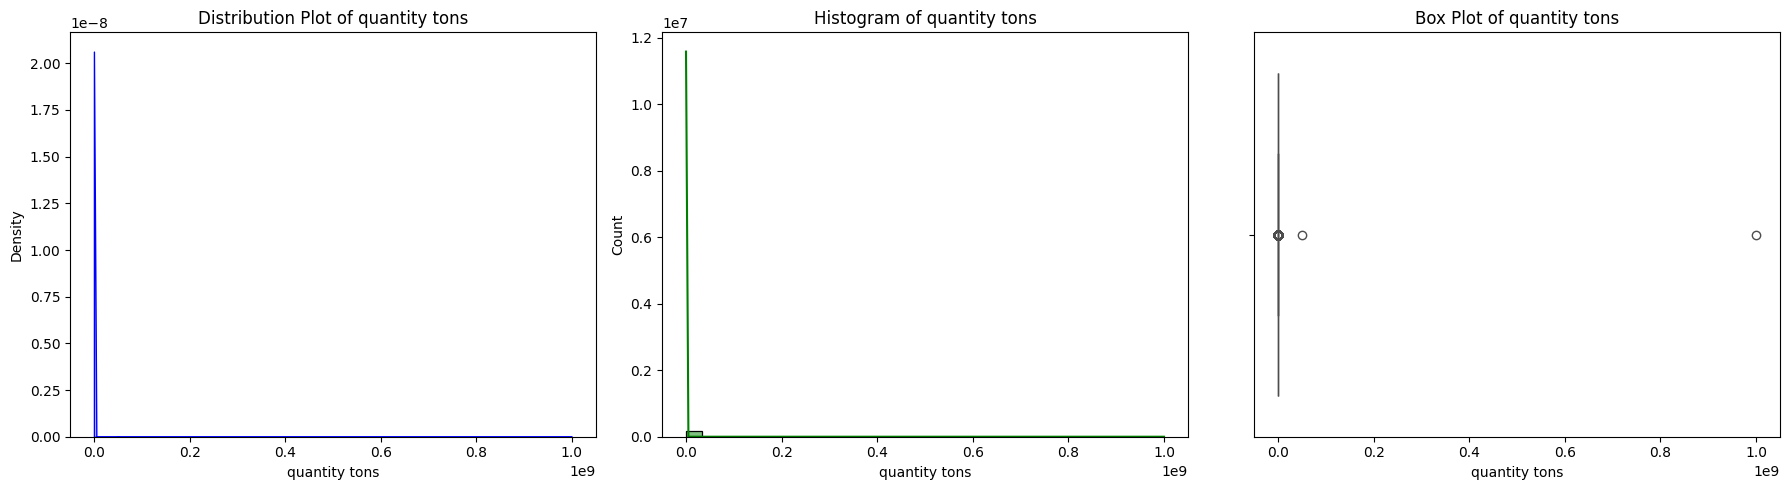

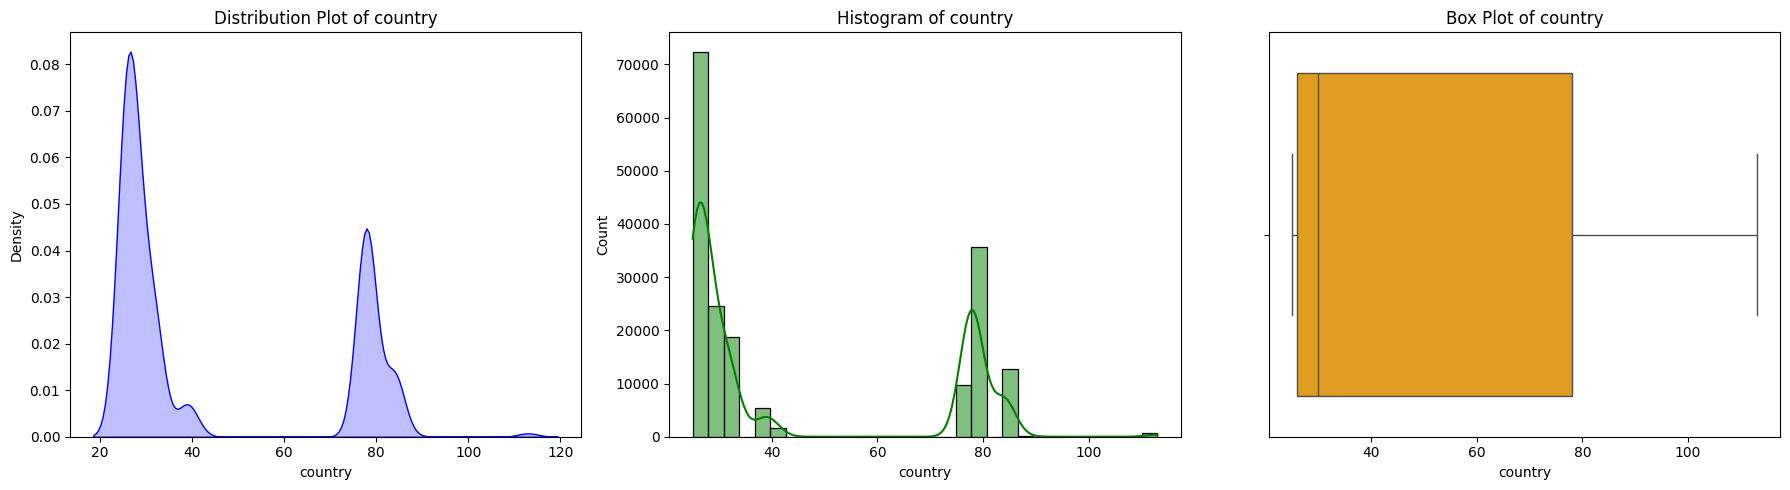

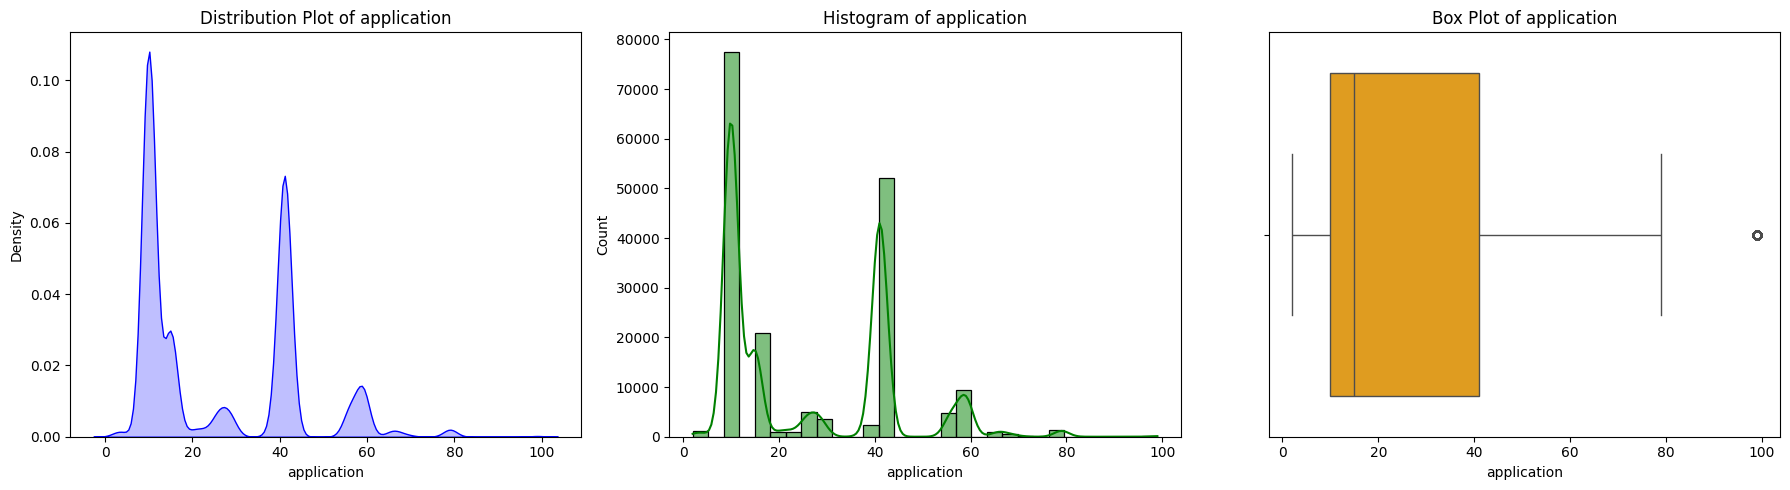

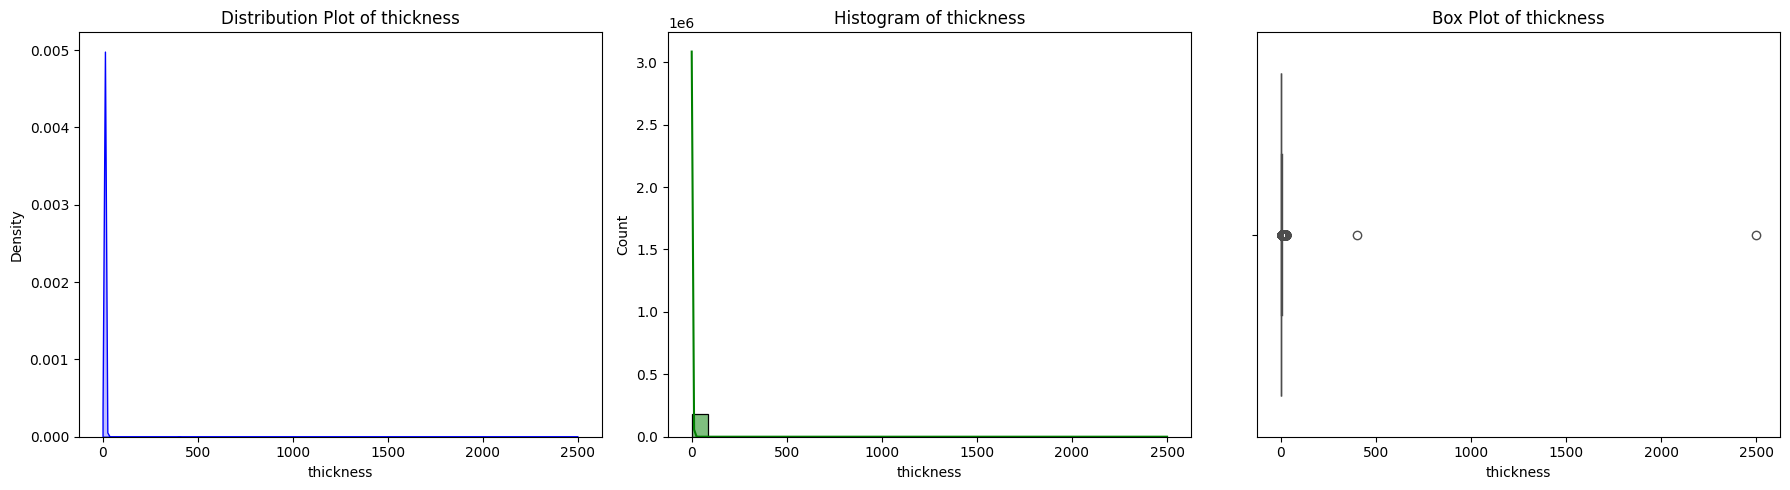

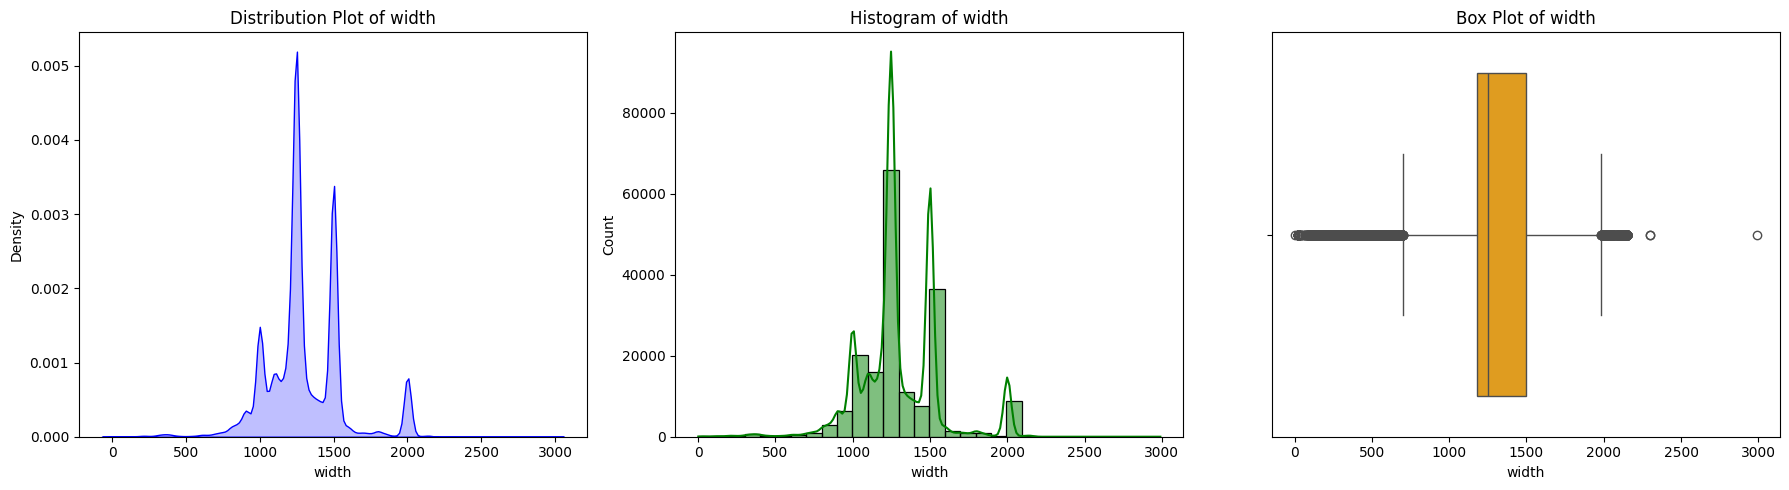

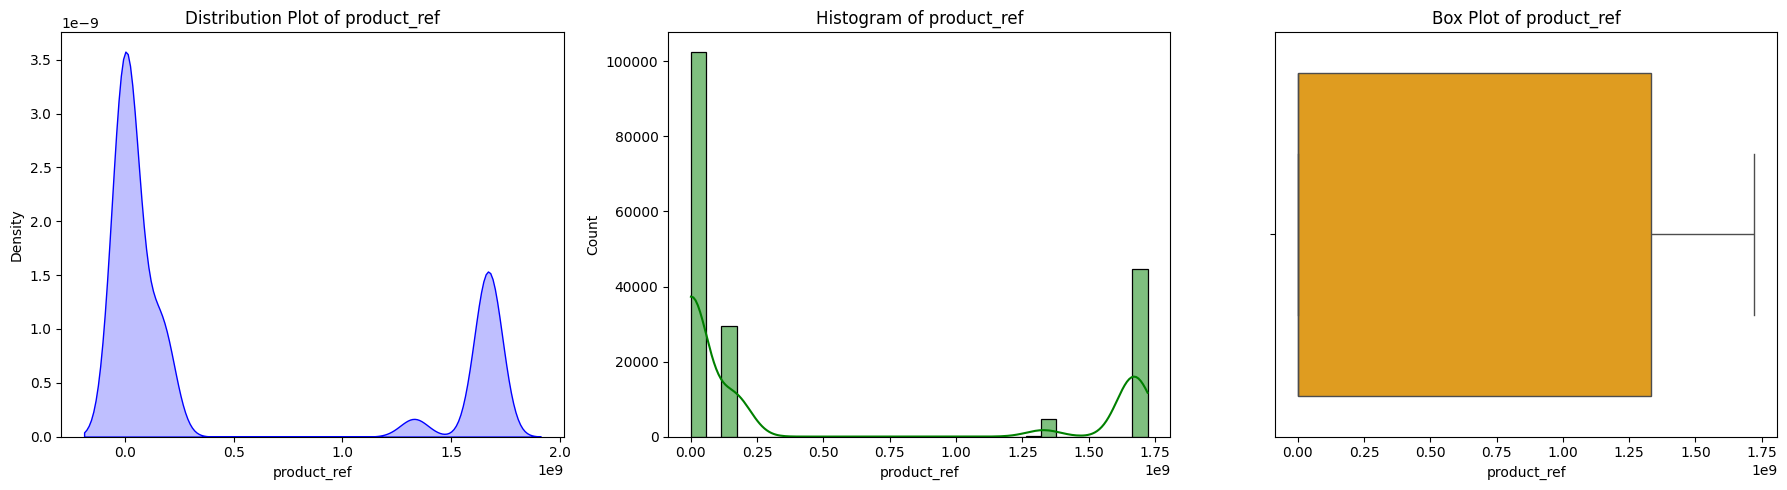

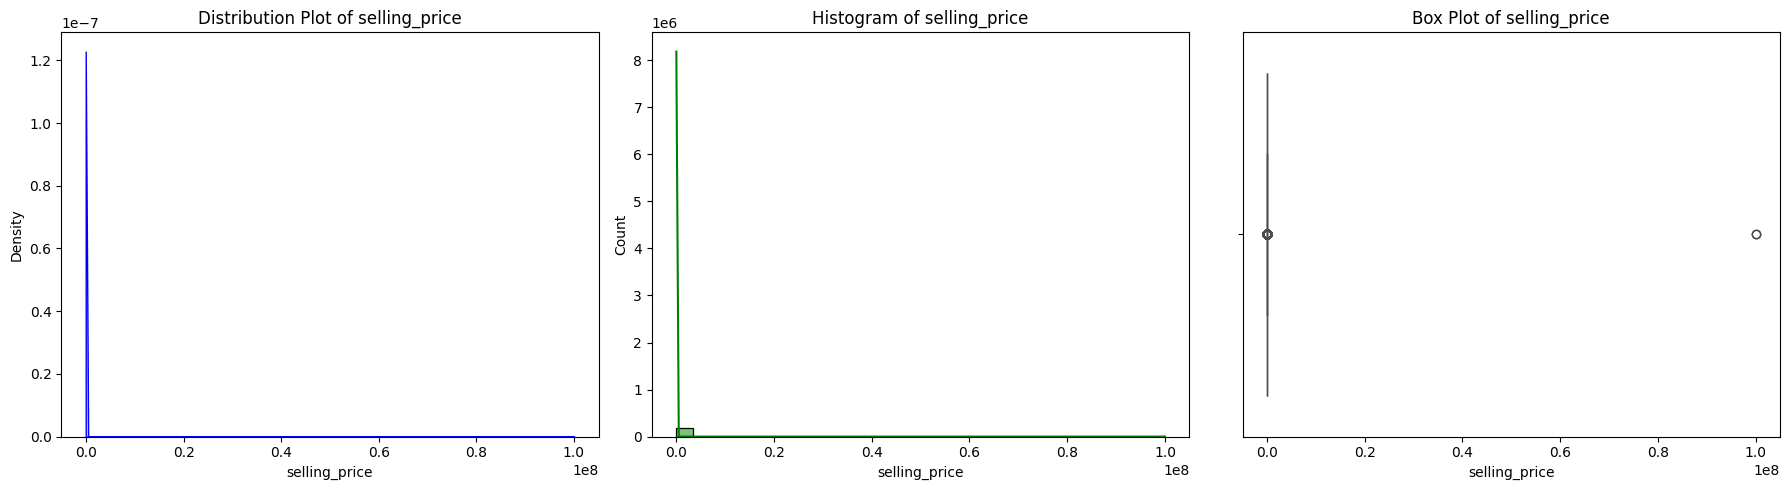

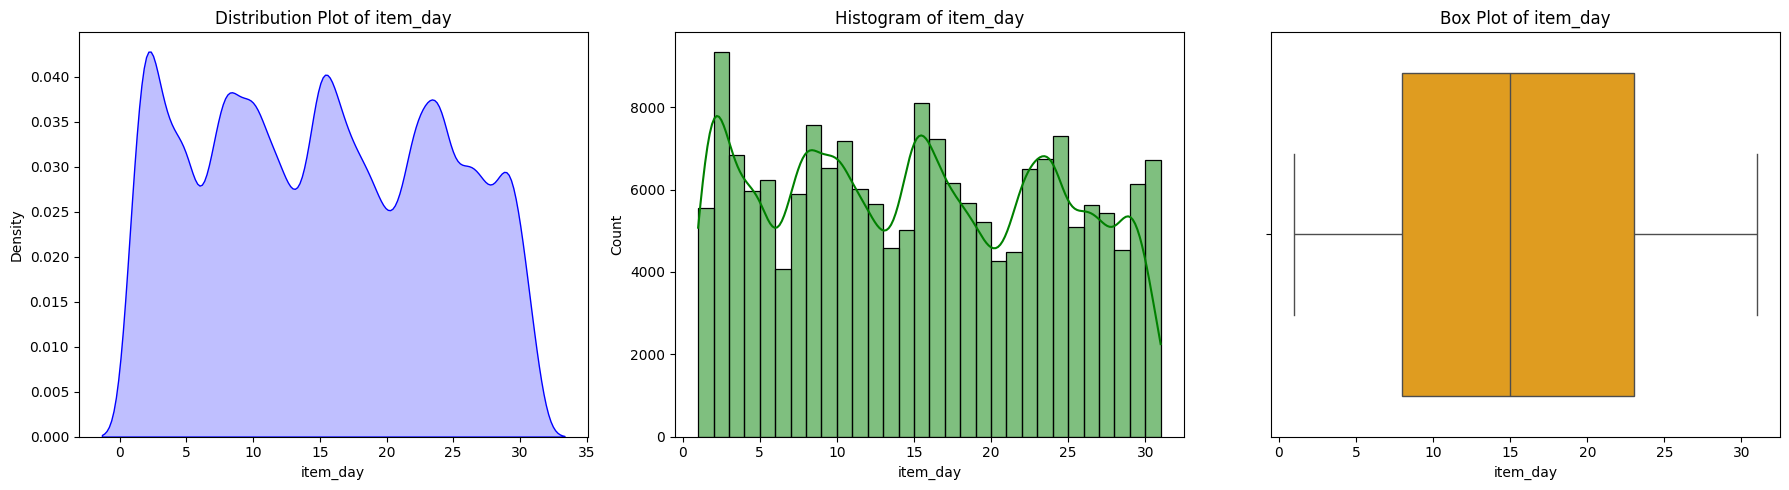

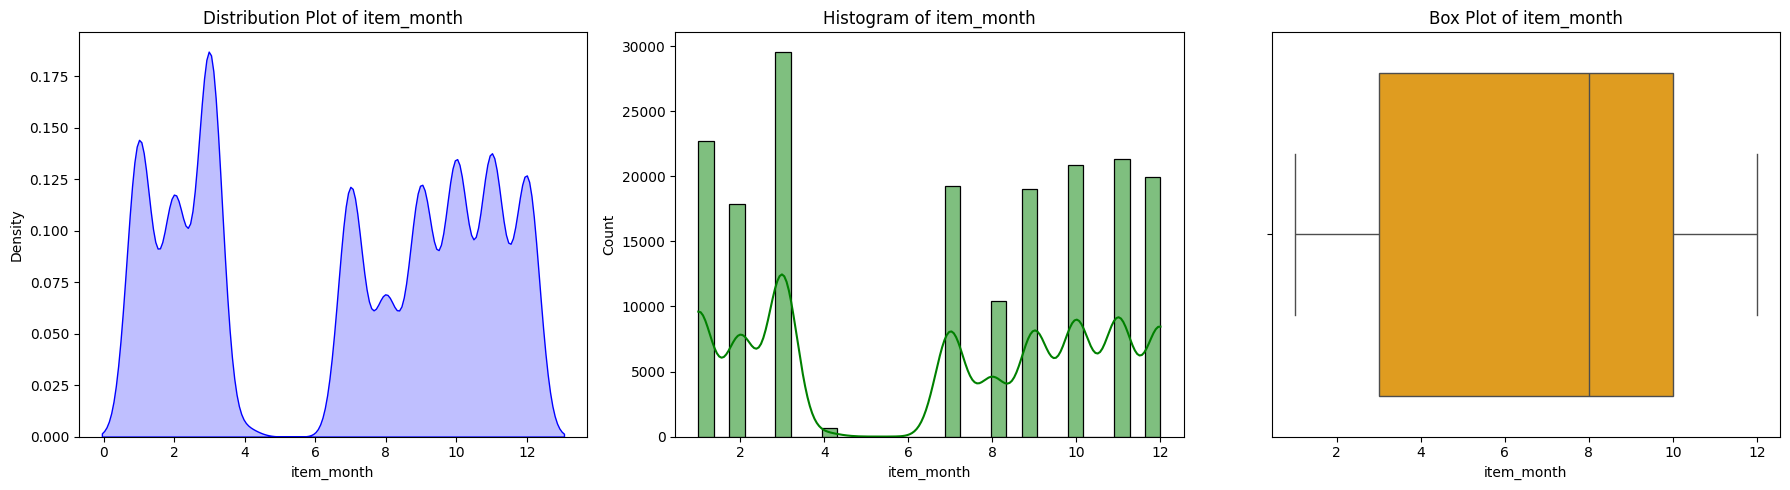

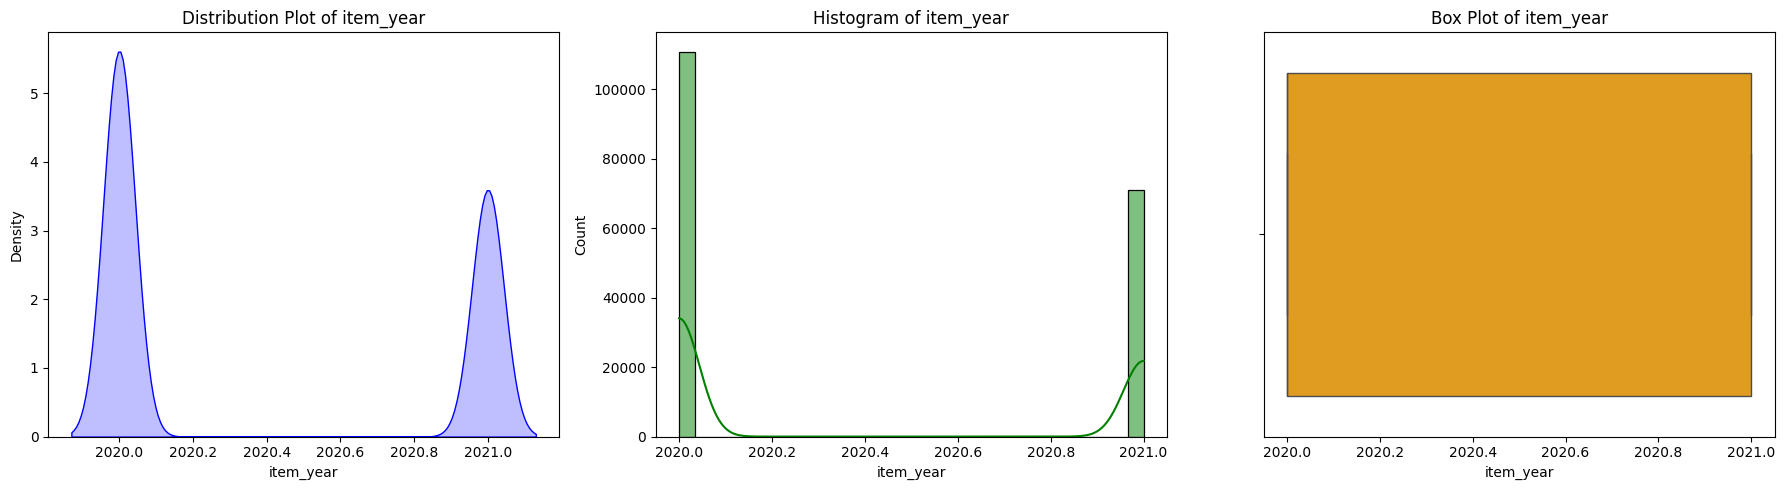

/var/folders/21/rvxvvfn16kb7dvy04sr9mpr00000gn/T/ipykernel_27676/298978043.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, ax=axes[0], fill=True, color='blue')


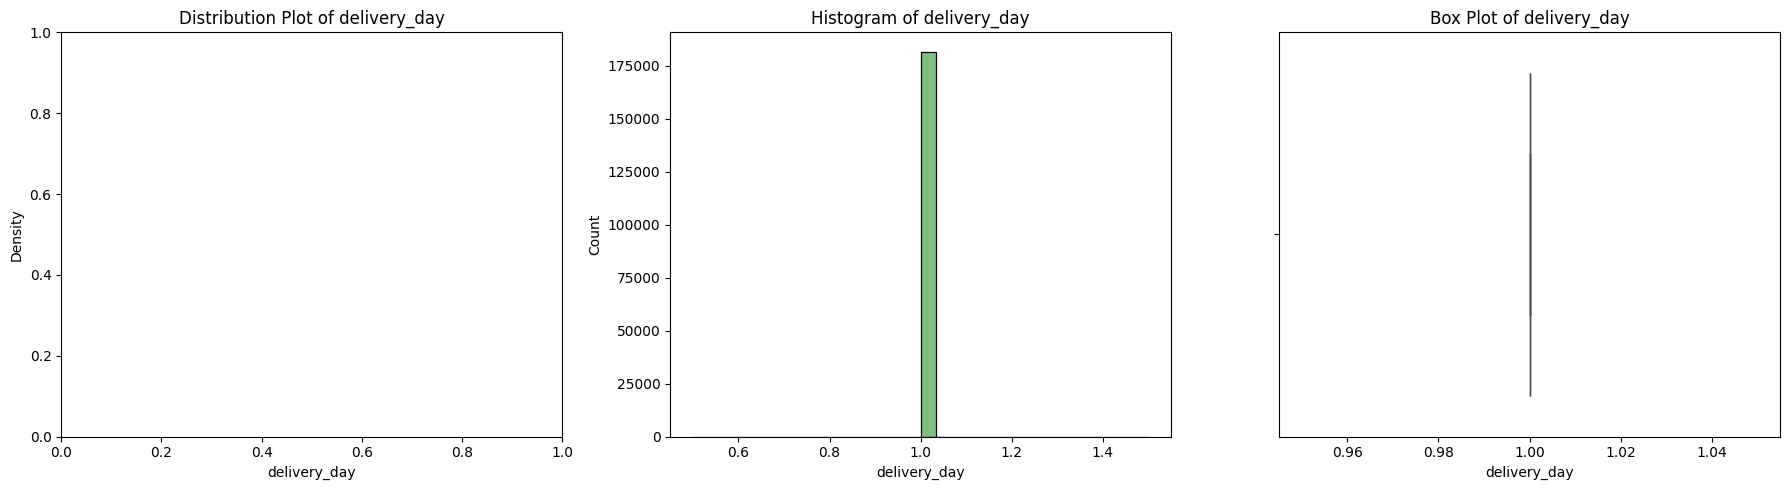

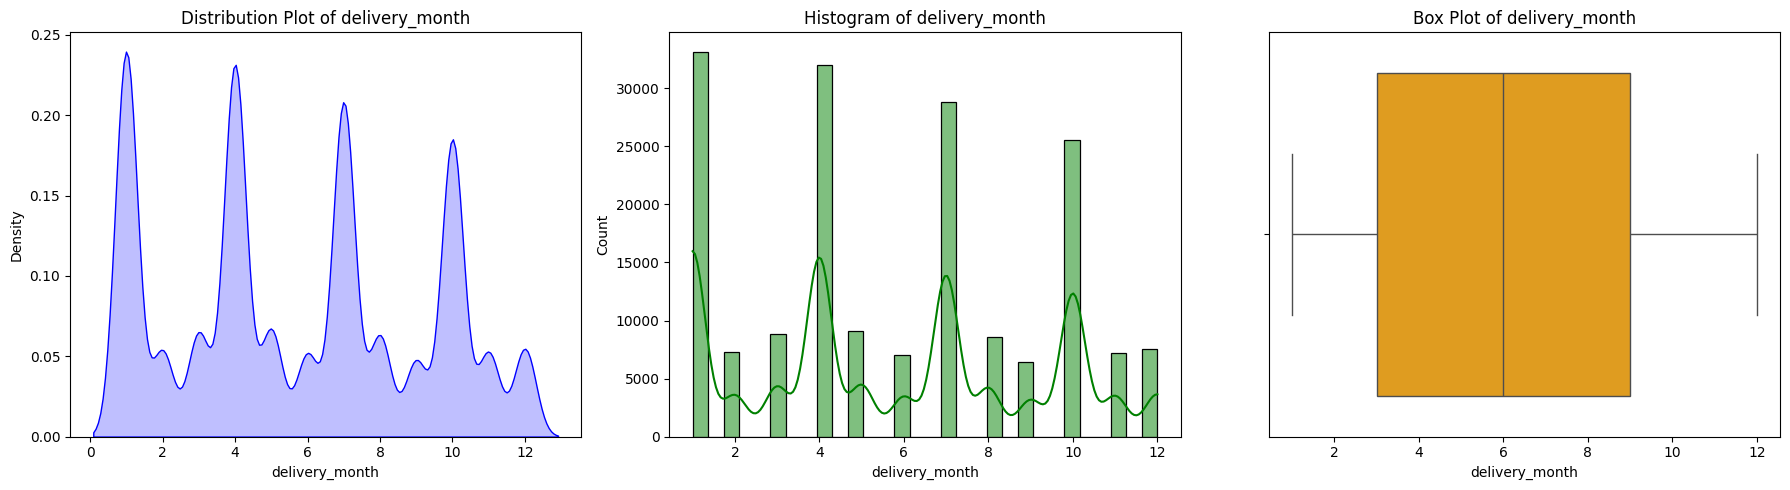

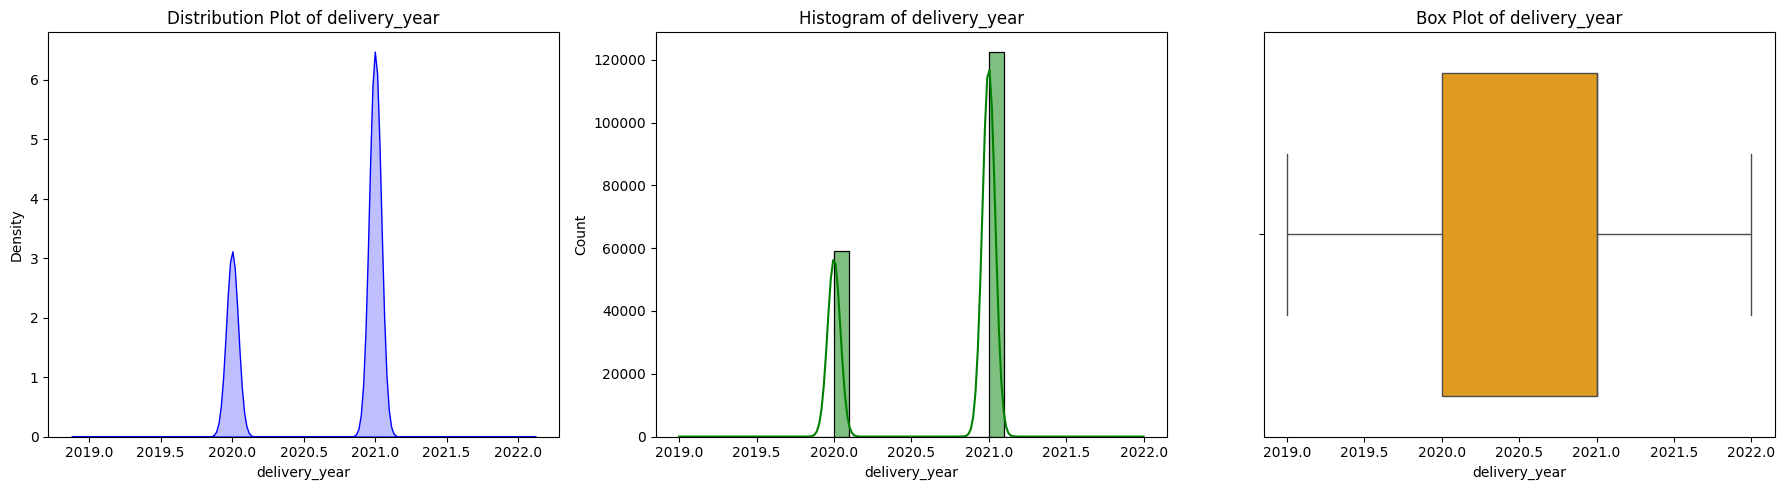

In [178]:
for col in numeric_columns:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Create a grid with 1 row, 3 columns
    
    # 1. Distribution Plot
    sns.kdeplot(data=df, x=col, ax=axes[0], fill=True, color='blue')
    axes[0].set_title(f'Distribution Plot of {col}')
    
    # 2. Histogram
    sns.histplot(data=df, x=col, bins=30, ax=axes[1], color='green', kde=True)
    axes[1].set_title(f'Histogram of {col}')
    
    # 3. Box Plot
    sns.boxplot(data=df, x=col, ax=axes[2], color='orange')
    axes[2].set_title(f'Box Plot of {col}')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

In [179]:
def handle_outliers_with_iqr(df, columns):
    """
    Handles outliers in specified columns using the IQR and clipping method.

    Parameters:
    - df (pd.DataFrame): The DataFrame to process.
    - columns (list): List of columns to handle outliers.

    Returns:
    - pd.DataFrame: DataFrame with outliers handled in specified columns.
    """
    for column in columns:
        # Calculate IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define thresholds
        lower_threshold = Q1 - 1.5 * IQR
        upper_threshold = Q3 + 1.5 * IQR

        # Clip values
        df[column] = df[column].clip(lower=lower_threshold, upper=upper_threshold)
    
    return df


df = handle_outliers_with_iqr(df,numeric_columns)

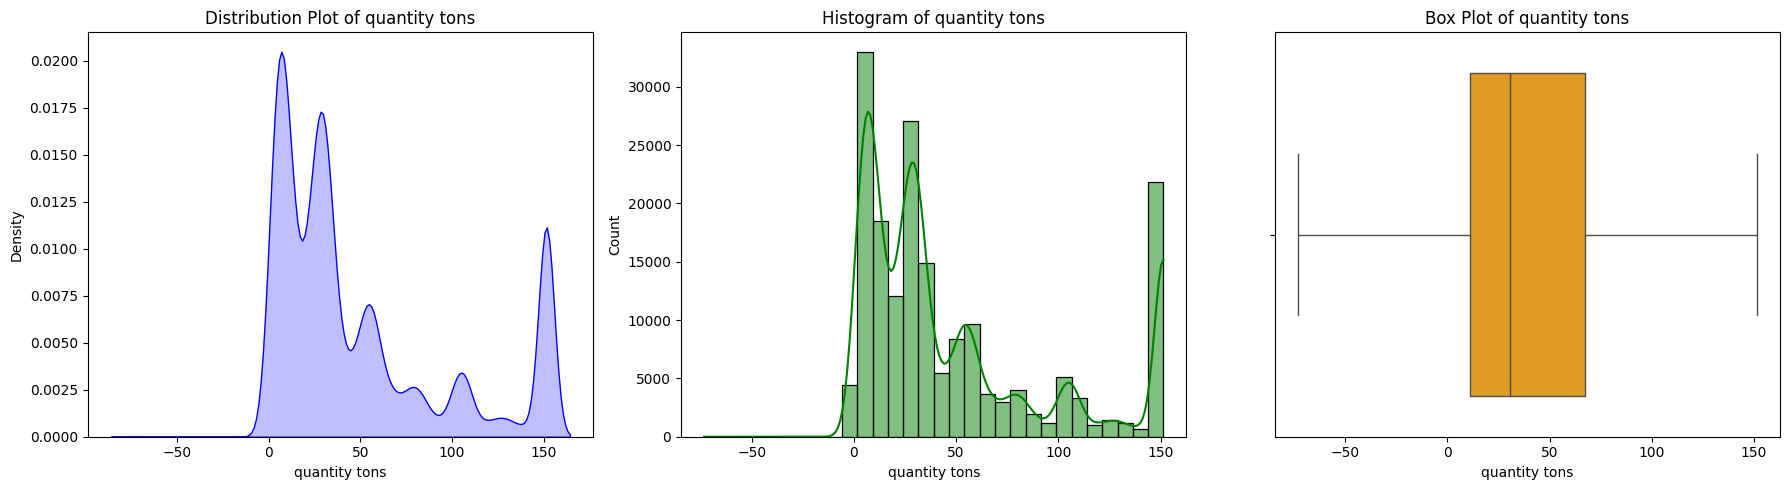

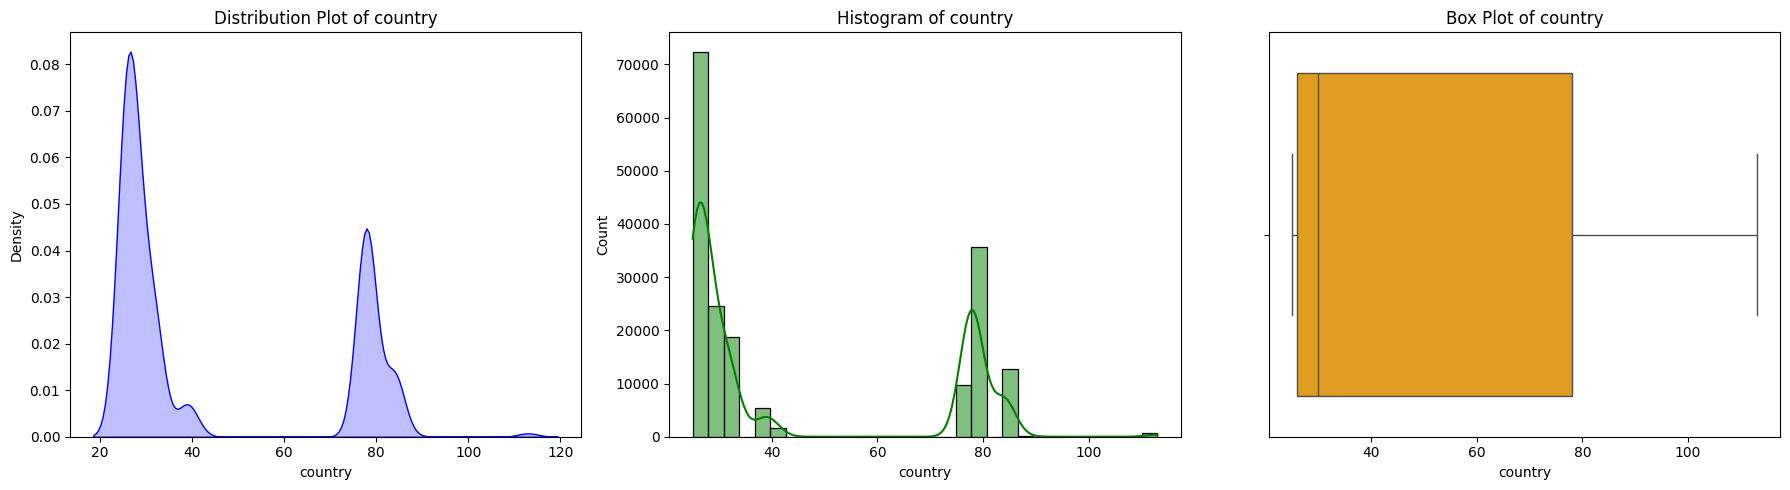

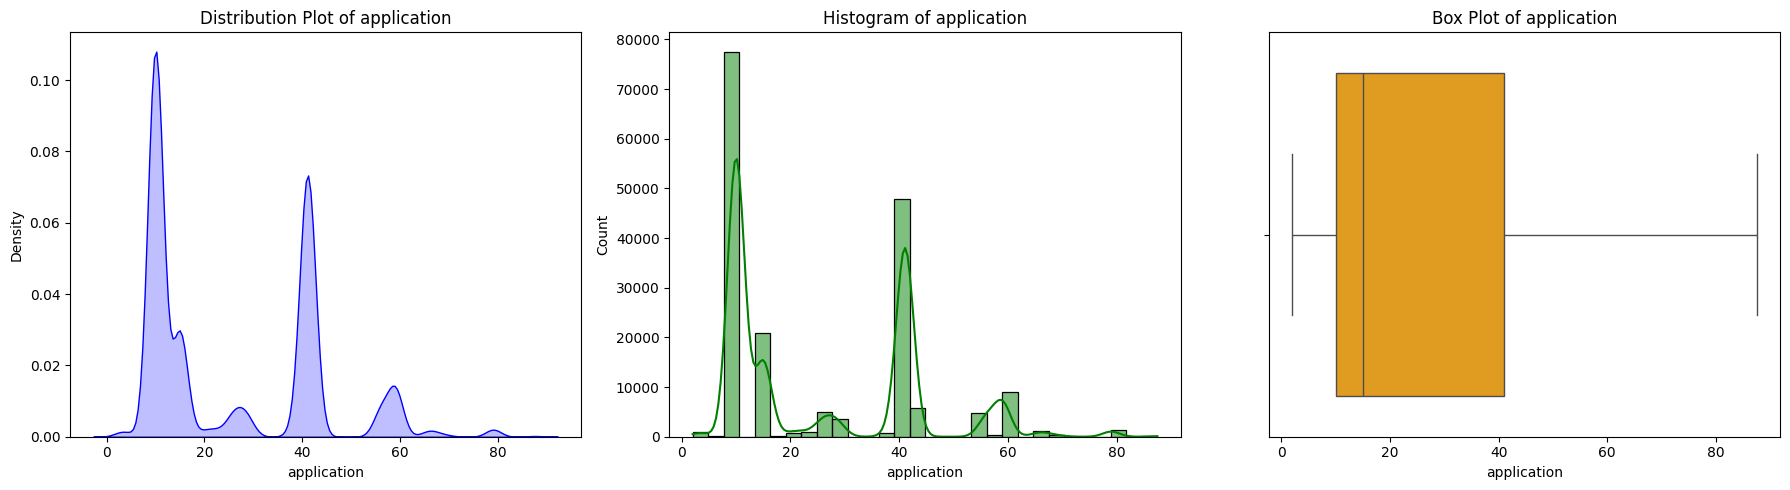

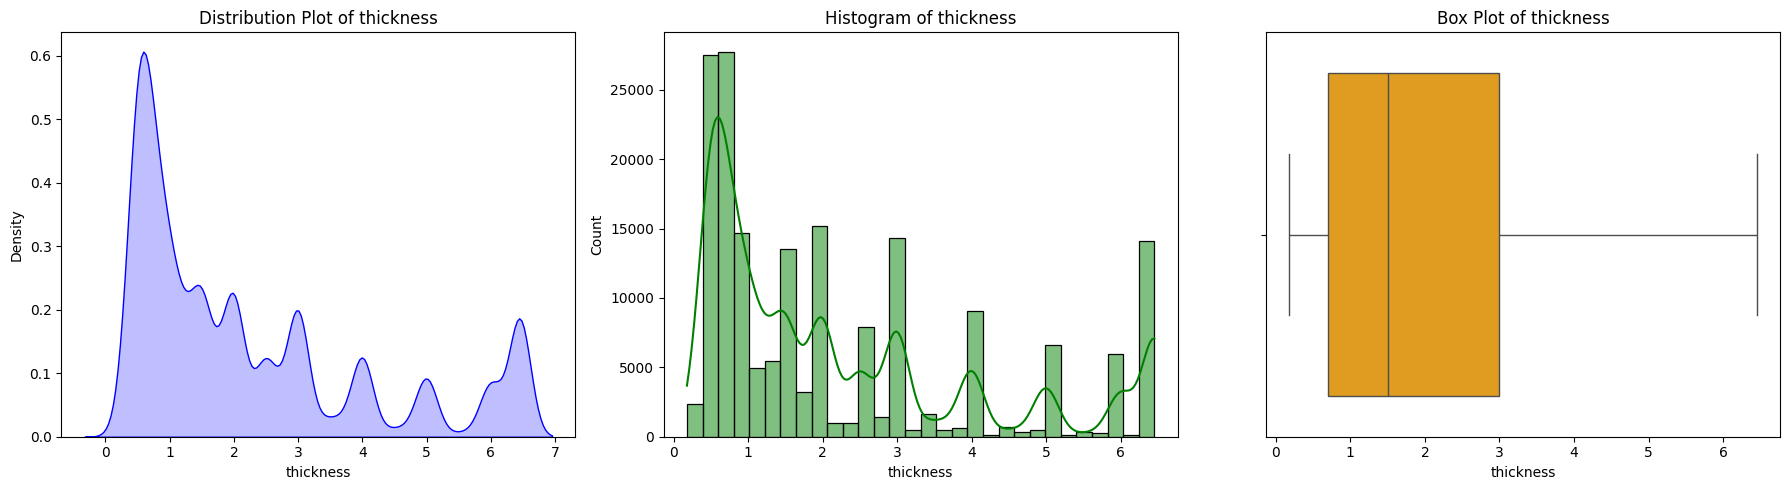

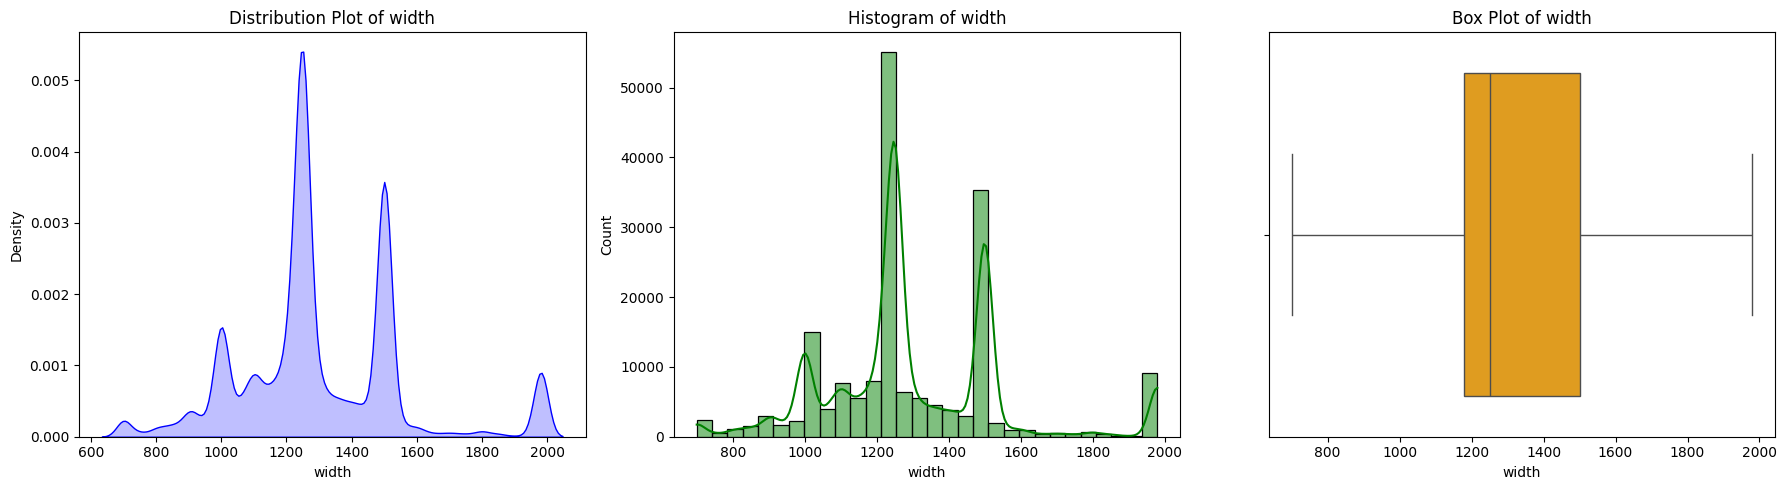

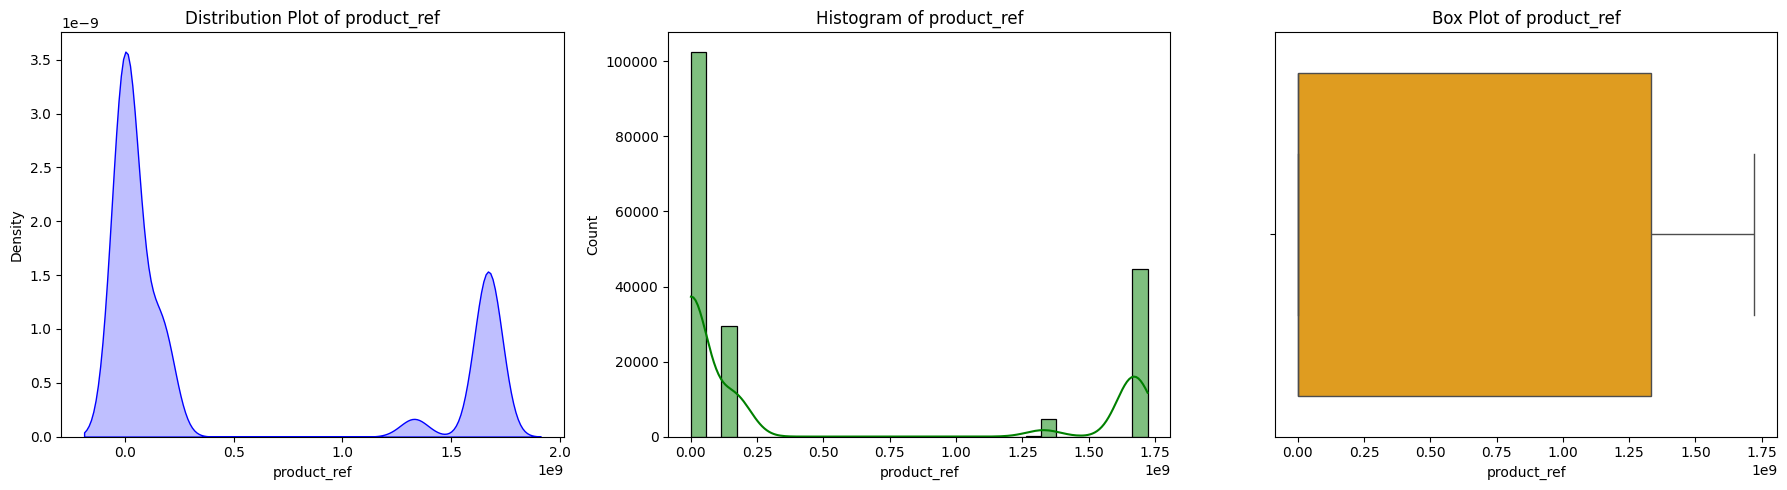

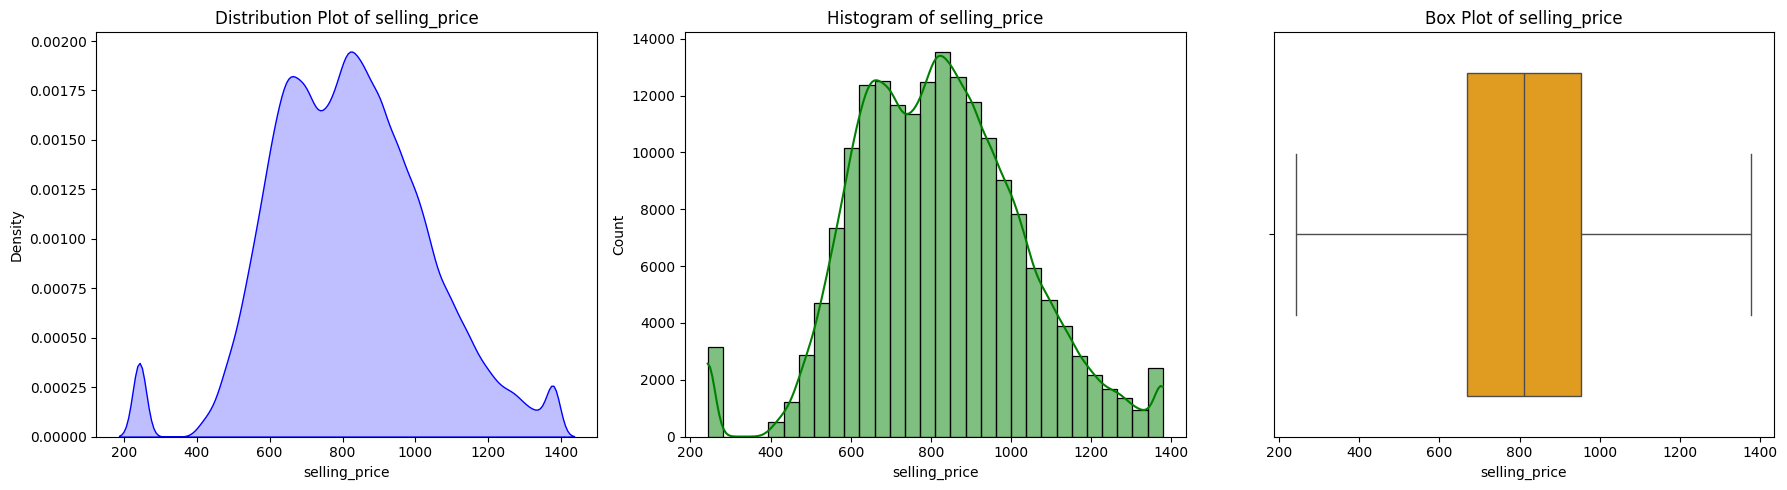

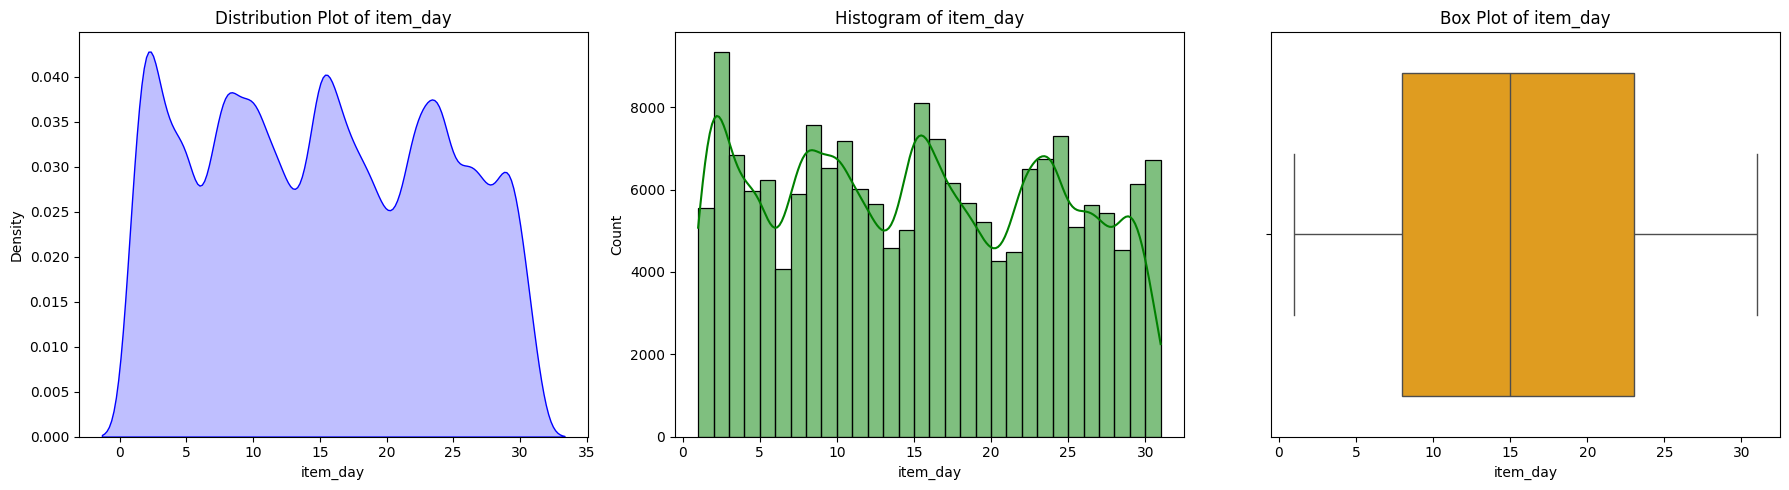

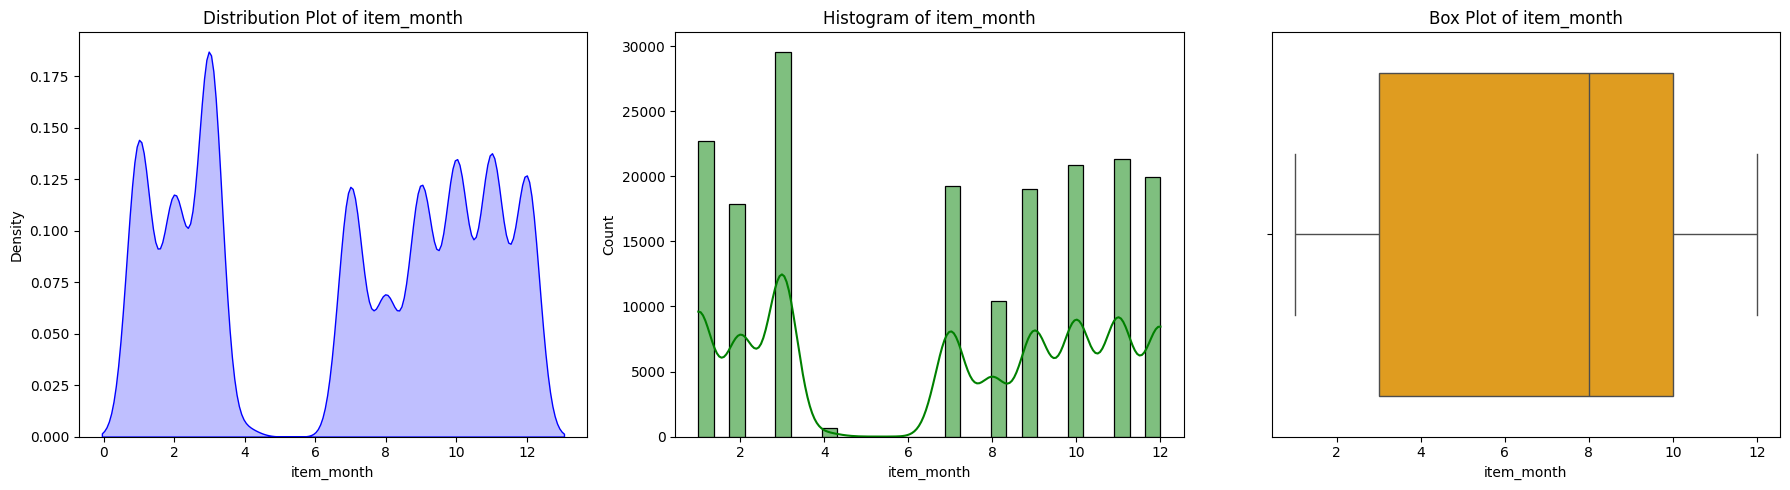

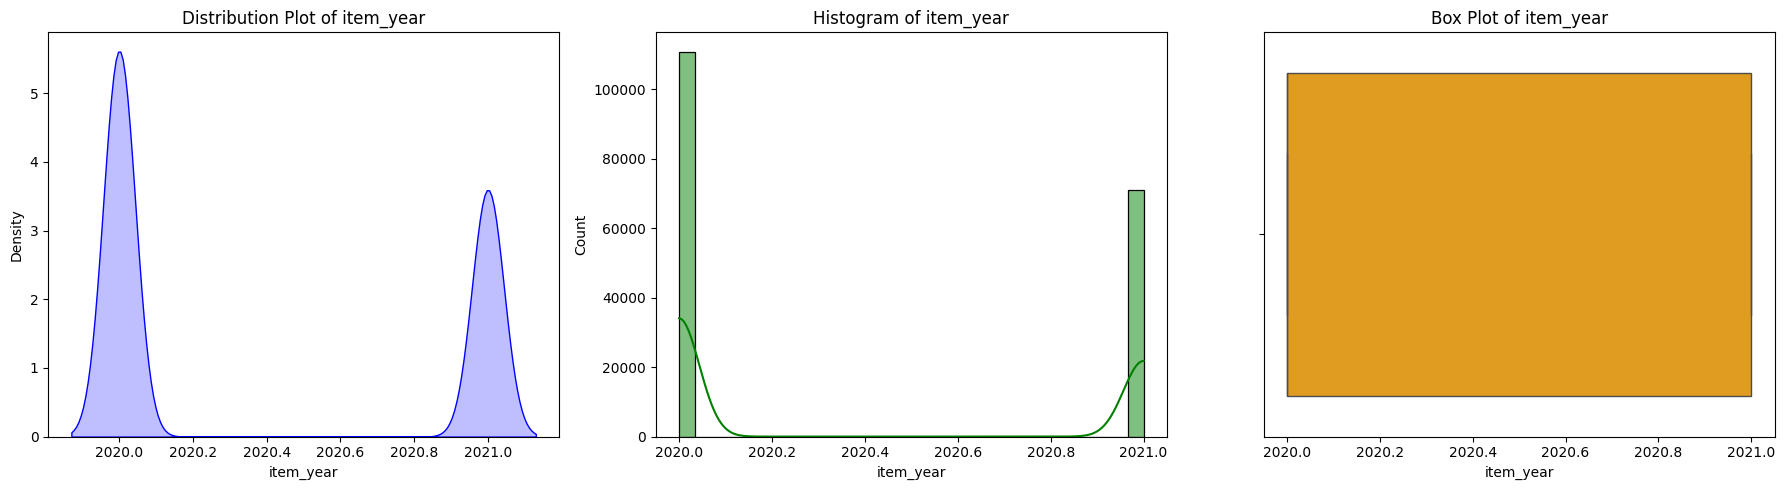

/var/folders/21/rvxvvfn16kb7dvy04sr9mpr00000gn/T/ipykernel_27676/298978043.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, ax=axes[0], fill=True, color='blue')


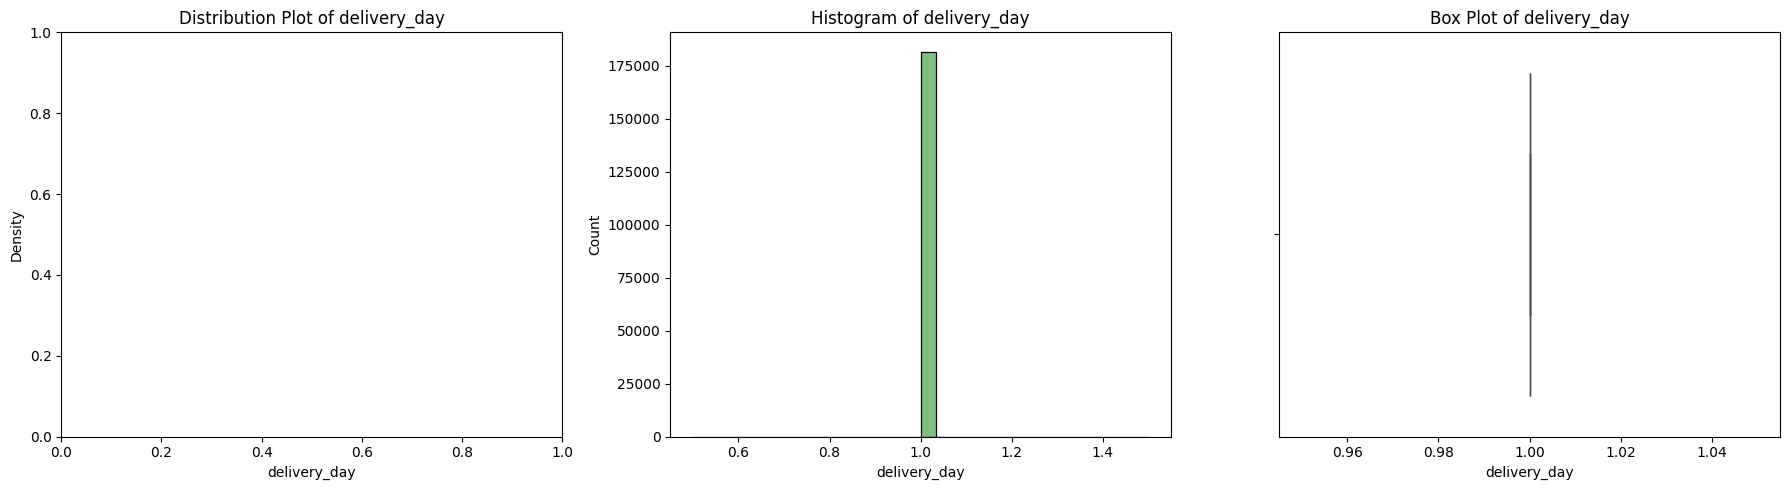

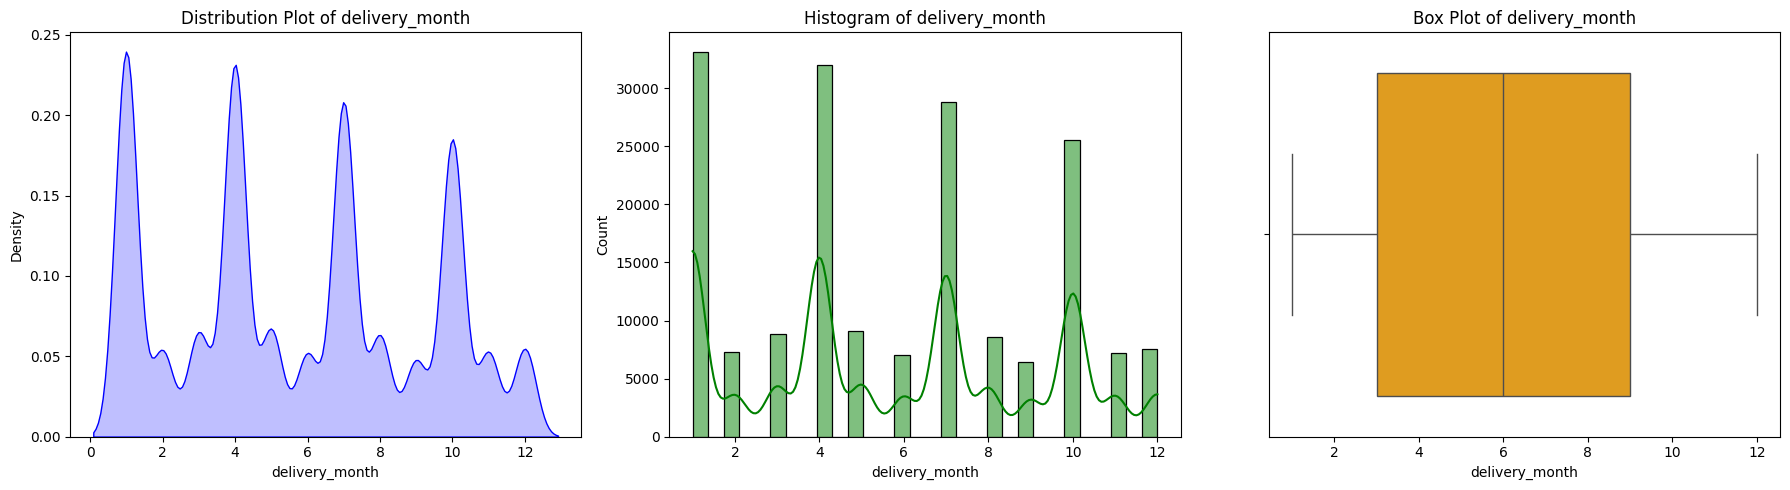

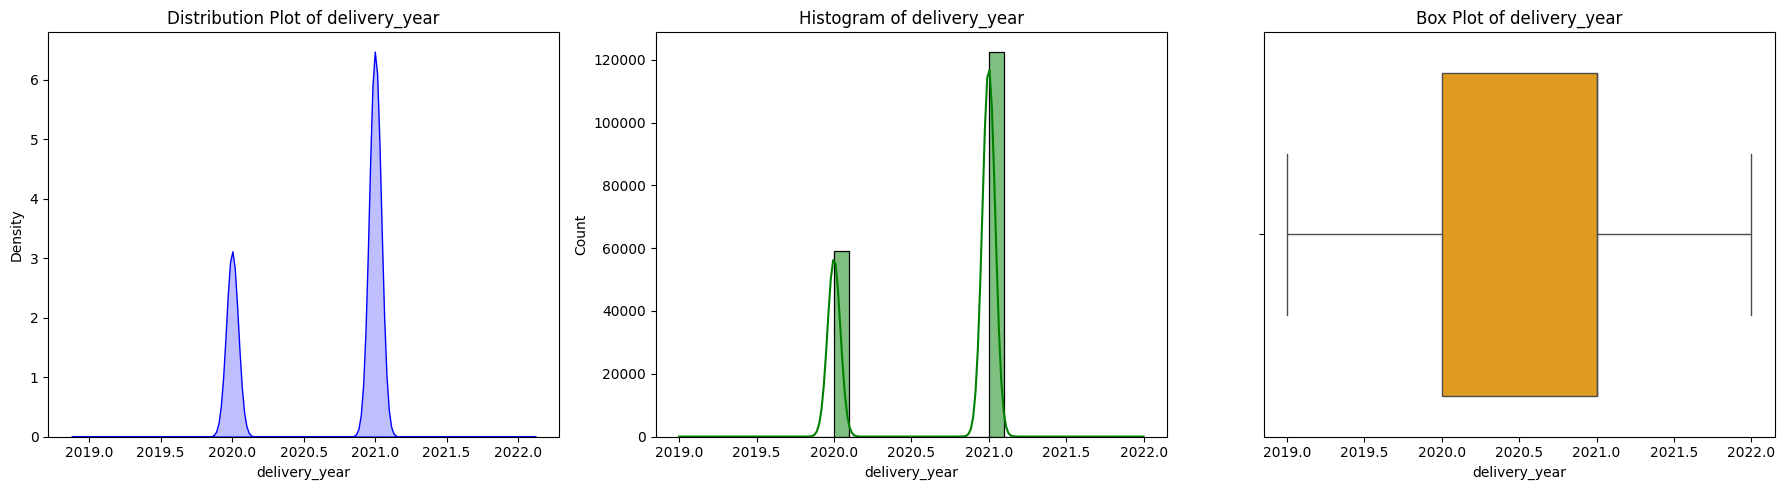

In [180]:
for col in numeric_columns:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Create a grid with 1 row, 3 columns
    
    # 1. Distribution Plot
    sns.kdeplot(data=df, x=col, ax=axes[0], fill=True, color='blue')
    axes[0].set_title(f'Distribution Plot of {col}')
    
    # 2. Histogram
    sns.histplot(data=df, x=col, bins=30, ax=axes[1], color='green', kde=True)
    axes[1].set_title(f'Histogram of {col}')
    
    # 3. Box Plot
    sns.boxplot(data=df, x=col, ax=axes[2], color='orange')
    axes[2].set_title(f'Box Plot of {col}')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

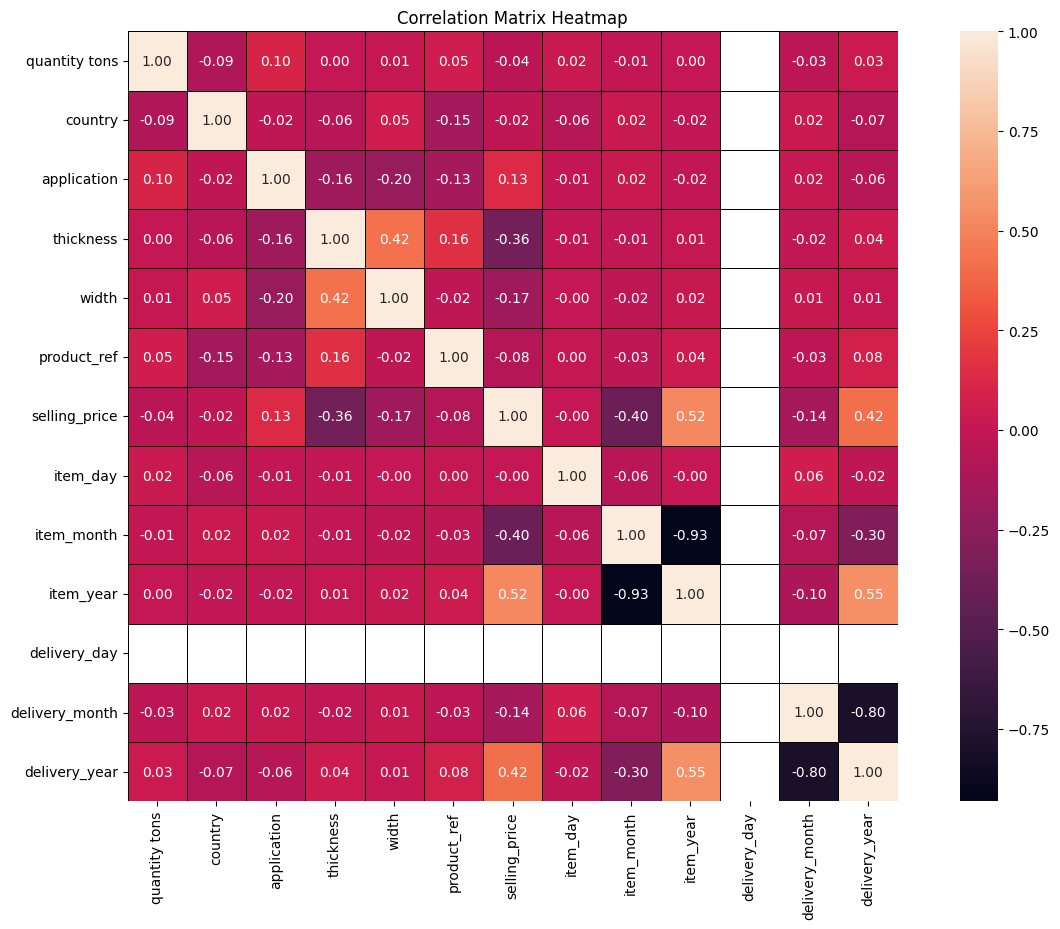

In [184]:
# Sample data
data = df[numeric_columns].corr()
plt.figure(figsize=(16,10))
# Heatmap
sns.heatmap(
    data,
    annot=True,          # Show values in each cell
    fmt=".2f",           # Format for the annotations
    
    linewidths=0.5,      # Line width between cells
    linecolor="black",   # Line color between cells
    cbar=True,           # Display the color bar
    square=True          # Make cells square
)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [185]:
df[numeric_columns].corr()

,quantity tons,country,application,thickness,width,product_ref,selling_price,item_day,item_month,item_year,delivery_day,delivery_month,delivery_year
quantity tons,1.000000,-0.090034,0.095750,0.002792,0.010411,0.051467,-0.041752,0.023526,-0.008996,0.003173,NaN,-0.029958,0.028414
country,-0.090034,1.000000,-0.019729,-0.055490,0.054070,-0.147477,-0.022248,-0.059091,0.023033,-0.016288,NaN,0.022434,-0.071921
application,0.095750,-0.019729,1.000000,-0.163570,-0.198581,-0.132119,0.129409,-0.008847,0.020016,-0.016740,NaN,0.018380,-0.060728
thickness,0.002792,-0.055490,-0.163570,1.000000,0.419061,0.155784,-0.363789,-0.009143,-0.011500,0.010295,NaN,-0.017149,0.037147
width,0.010411,0.054070,-0.198581,0.419061,1.000000,-0.024106,-0.173254,-0.001499,-0.022885,0.018216,NaN,0.013831,0.008467
product_ref,0.051467,-0.147477,-0.132119,0.155784,-0.024106,1.000000,-0.077853,0.004641,-0.025265,0.036868,NaN,-0.030163,0.078991
selling_price,-0.041752,-0.022248,0.129409,-0.363789,-0.173254,-0.077853,1.000000,-0.000008,-0.402427,0.518590,NaN,-0.136452,0.418325
item_day,0.023526,-0.059091,-0.008847,-0.009143,-0.001499,0.004641,-0.000008,1.000000,-0.055568,-0.000831,NaN,0.056100,-0.018693
item_month,-0.008996,0.023033,0.020016,-0.011500,-0.022885,-0.025265,-0.402427,-0.055568,1.000000,-0.931439,NaN,-0.071024,-0.301789
item_year,0.003173,-0.016288,-0.016740,0.010295,0.018216,0.036868,0.518590,-0.000831,-0.931439,1.000000,NaN,-0.102767,0.552672


In [189]:
df['delivery_year'].unique()

array([2021., 2022., 2020., 2019.])

In [190]:
df.isnull().sum()

quantity tons     0
country           0
status            0
item type         0
application       0
thickness         0
width             0
product_ref       0
selling_price     0
item_day          0
item_month        0
item_year         0
delivery_day      0
delivery_month    0
delivery_year     0
dtype: int64

In [191]:
X = df.drop(columns=['selling_price'])
y = df['selling_price']

In [194]:

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer# Identify Categorical and Numeric Columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['number']).columns

# Define Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('scaler', StandardScaler(), numeric_cols)
    ]
)

In [196]:
from sklearn.pipeline import Pipeline# Build Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])


In [197]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
import numpy as np

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "KNN Regressor": KNeighborsRegressor(),
    "SVR": SVR(),
    "XGBoost": XGBRegressor(),
}

# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Apply Preprocessing
X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)
# Evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MSE": mse, "MAE": mae, "R²": r2}

# Print Results
for model, metrics in results.items():
    print(f"{model}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print()

Linear Regression:
  MSE: 15001.5287
  MAE: 95.1572
  R²: 0.6554

Ridge Regression:
  MSE: 15001.4077
  MAE: 95.1558
  R²: 0.6554

Lasso Regression:
  MSE: 15287.2227
  MAE: 96.0263
  R²: 0.6488

ElasticNet Regression:
  MSE: 24752.8888
  MAE: 114.3790
  R²: 0.4313

Decision Tree:
  MSE: 3327.5922
  MAE: 30.8713
  R²: 0.9236

Random Forest:
  MSE: 1958.3353
  MAE: 25.7437
  R²: 0.9550

AdaBoost:
  MSE: 12868.5242
  MAE: 89.2254
  R²: 0.7044

Gradient Boosting:
  MSE: 5034.3936
  MAE: 50.6636
  R²: 0.8843

KNN Regressor:
  MSE: 5662.8156
  MAE: 47.1293
  R²: 0.8699

SVR:
  MSE: 16016.1428
  MAE: 84.2896
  R²: 0.6320

XGBoost:
  MSE: 2769.1443
  MAE: 35.2005
  R²: 0.9364



In [193]:
for model, metrics in results.items():
    print(f"{model}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print()

Index(['quantity tons', 'country', 'status', 'item type', 'application',
       'thickness', 'width', 'product_ref', 'selling_price', 'item_day',
       'item_month', 'item_year', 'delivery_day', 'delivery_month',
       'delivery_year'],
      dtype='object')

In [199]:
for model in results.items():
    print(model)

('Linear Regression', {'MSE': 15001.528670218124, 'MAE': 95.15724858162574, 'R²': 0.6553575715256279})
('Ridge Regression', {'MSE': 15001.407719911409, 'MAE': 95.15576011351818, 'R²': 0.6553603502162764})
('Lasso Regression', {'MSE': 15287.222663716186, 'MAE': 96.02627498751909, 'R²': 0.6487940889710008})
('ElasticNet Regression', {'MSE': 24752.88880711165, 'MAE': 114.37901665034069, 'R²': 0.43133157308327674})
('Decision Tree', {'MSE': 3327.592177549925, 'MAE': 30.871342242299523, 'R²': 0.9235524942654757})
('Random Forest', {'MSE': 1958.335310447471, 'MAE': 25.743727361403938, 'R²': 0.9550095558928184})
('AdaBoost', {'MSE': 12868.524218795195, 'MAE': 89.2253689929326, 'R²': 0.7043608331428557})
('Gradient Boosting', {'MSE': 5034.393585513706, 'MAE': 50.66362420312703, 'R²': 0.8843407449100974})
('KNN Regressor', {'MSE': 5662.815622180597, 'MAE': 47.12934751616898, 'R²': 0.8699034897753153})
('SVR', {'MSE': 16016.142846416453, 'MAE': 84.28959095128326, 'R²': 0.6320480074580859})
('XGB

In [3]:
df

NameError: name 'df' is not defined

In [4]:
import pandas as pd

In [5]:
train_data = pd.read_excel('/Users/Dinakaraprabhu/Data Science Projects/Industrial-Copper-Modeling/artifact/regression/train.xlsx')

In [6]:
train_data.columns

Index(['quantity tons', 'country', 'status', 'item type', 'application',
       'thickness', 'width', 'product_ref', 'selling_price', 'item_day',
       'item_month', 'item_year', 'delivery_day', 'delivery_month',
       'delivery_year'],
      dtype='object')

In [7]:
numeric_cols = train_data.select_dtypes(include=['number']).columns
categorical_cols = train_data.select_dtypes(include=['object']).columns


In [8]:
numeric_cols

Index(['quantity tons', 'country', 'application', 'thickness', 'width',
       'product_ref', 'selling_price', 'item_day', 'item_month', 'item_year',
       'delivery_day', 'delivery_month', 'delivery_year'],
      dtype='object')

In [9]:
categorical_cols

Index(['status', 'item type'], dtype='object')

In [10]:
df = pd.read_excel("/Users/Dinakaraprabhu/Data Science Projects/Industrial-Copper-Modeling/artifact/regression/data.xlsx")

In [11]:
df.isna().sum()

quantity tons      1
country           28
status             2
item type          0
application       24
thickness          1
width              0
product_ref        0
selling_price      0
item_day           3
item_month         3
item_year          3
delivery_day       3
delivery_month     3
delivery_year      3
dtype: int64